# Learn XOR using a Neural Network

For demonstration purposes, we learn neural network models of increasing complexity implementing the XOR function. Eventually, we will arrive at the model suggested in this [tutorial](https://blog.thoughtram.io/machine-learning/2016/11/02/understanding-XOR-with-keras-and-tensorlow.html).

## Imports

In [1]:
!pip install numpy 
!pip install keras 
!pip install sklearn 

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.metrics import mean_squared_error, accuracy_score

import matplotlib.pyplot as plt

Using TensorFlow backend.


## Create the XOR function as data

In [3]:
# Create XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Y = np.array([[0],[1],[1],[0]], "float32")

# Dataset shape
print("Input: {0}".format(X.shape))
print("Output: {0}".format(Y.shape))

Input: (4, 2)
Output: (4, 1)


## Model 1

Define and train a too trivial neural network model. It is purely linear and, hence, misses 50% of the right answers.

In [4]:
# Define the model
model1 = Sequential()
model1.add(Dense(1, input_dim=2, activation='linear'))

# Compile the model
model1.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


[]

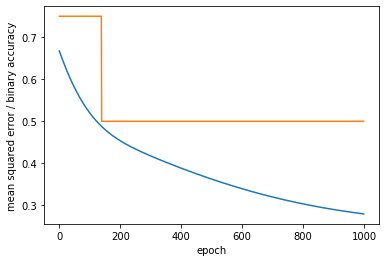

In [5]:
# Train the model
history = model1.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [6]:
preds = model1.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.28
Binary accuracy: 0.50


In [7]:
preds

array([[0.2351011 ],
       [0.5102881 ],
       [0.43219224],
       [0.7073792 ]], dtype=float32)

Use the model

In [8]:
def my_xor(x1,x2,m):
    """Return x1 XOR x2."""
    res =  m.predict(np.array([[x1,x2]], "float32")).round()
    return int(res[0][0])

In [9]:
print(format(my_xor(0,0, model1)))
print(format(my_xor(0,1, model1)))
print(format(my_xor(1,0, model1)))
print(format(my_xor(1,1, model1)))

0
1
0
1


## Model 2

The slightly more complex neural network model introduces a sigmpod activation function. It is hence not linear anymore. However, its accuracy does not improve.

In [10]:
# Define the model
model2 = Sequential()
model2.add(Dense(1, input_dim=2, activation='sigmoid'))

# Compile the model
model2.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


[]

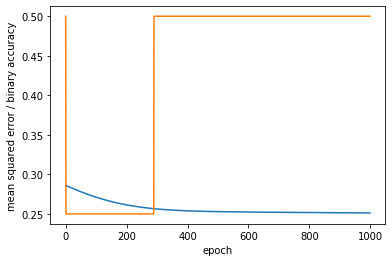

In [11]:
# Train the model
history = model2.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [12]:
preds = model2.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.25
Binary accuracy: 0.50


In [13]:
preds

array([[0.55426496],
       [0.5268886 ],
       [0.49278012],
       [0.46527073]], dtype=float32)

Use the model

In [14]:
print(format(my_xor(0,0, model2)))
print(format(my_xor(0,1, model2)))
print(format(my_xor(1,0, model2)))
print(format(my_xor(1,1, model2)))

1
1
0
0


## Model 3

We add a hidden layer with linear activation function:

In [15]:
# Define the model
model3 = Sequential()
model3.add(Dense(32, input_dim=2, activation='linear'))
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model3.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


[]

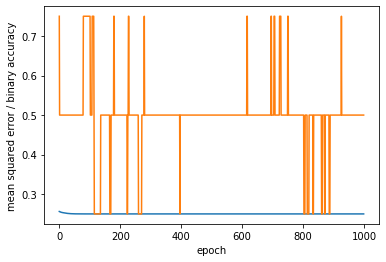

In [16]:
# Train the model
history = model3.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [17]:
preds = model3.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.25
Binary accuracy: 0.50


In [18]:
preds

array([[0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)

Use the model

In [19]:
print(format(my_xor(0,0, model3)))
print(format(my_xor(0,1, model3)))
print(format(my_xor(1,0, model3)))
print(format(my_xor(1,1, model3)))

0
0
0
0


## Model 4

Finally we change the linear activation of the hidden layer to a relu activation, define and train the neural network model:

In [21]:
# Define the model
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


[]

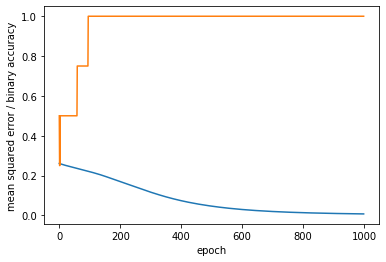

In [57]:
# Train the model
history = model.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [58]:
preds = model.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.01
Binary accuracy: 1.00


In [59]:
preds

array([[0.11316001],
       [0.930843  ],
       [0.9241423 ],
       [0.06833031]], dtype=float32)

Use the model

In [61]:
print(format(my_xor(0,0, model)))
print(format(my_xor(0,1, model)))
print(format(my_xor(1,0, model)))
print(format(my_xor(1,1, model)))

0
1
1
0


In [64]:
model.trainable_weights

[<tf.Variable 'dense_17/kernel:0' shape=(2, 32) dtype=float32, numpy=
 array([[ 0.41652033,  0.7749157 ,  0.83778775,  0.64122725,  0.3972386 ,
         -0.13516521, -0.60432655, -0.20290181, -0.7232665 , -0.35317   ,
         -0.8889785 , -0.2863993 ,  0.54030126,  0.37175888, -0.82367843,
         -0.33497408, -0.8567182 ,  0.5161414 , -0.25462216,  0.59564906,
          0.80922335,  0.00252599,  0.3720131 , -0.1701207 ,  0.34805146,
         -0.38333094, -0.17244412,  0.7132528 , -0.14648864, -0.17876345,
         -0.6636416 , -0.39717668],
        [ 0.41662493, -0.7749062 , -0.8376726 , -0.64101034,  0.40976927,
         -0.09223783,  0.60428804, -0.09886253,  0.7417394 , -0.08979583,
          1.1194593 ,  0.13293397,  0.5400226 ,  0.37171456,  0.8246372 ,
         -0.43565178,  0.85677105,  0.51622313, -0.41895077, -0.5953253 ,
         -0.8091849 , -0.3766787 ,  0.28819063, -0.38122708,  0.34833792,
          0.15245543, -0.25060123, -0.7132655 , -0.30406952, -0.3443008 ,
      